Input Values:
Demand: 2500
Supply: 300
Production: 4184.47

Visualizing Demand Membership Functions:


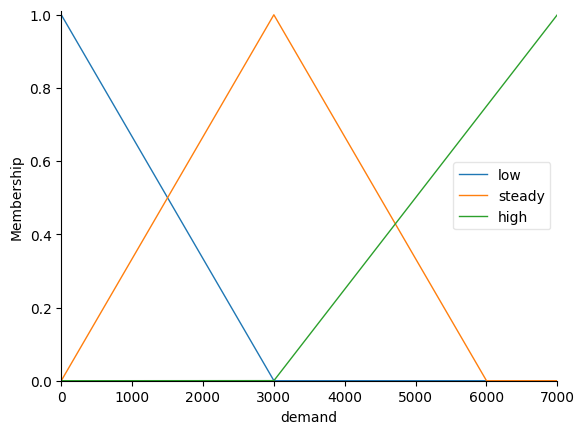


Visualizing Supply Membership Functions:


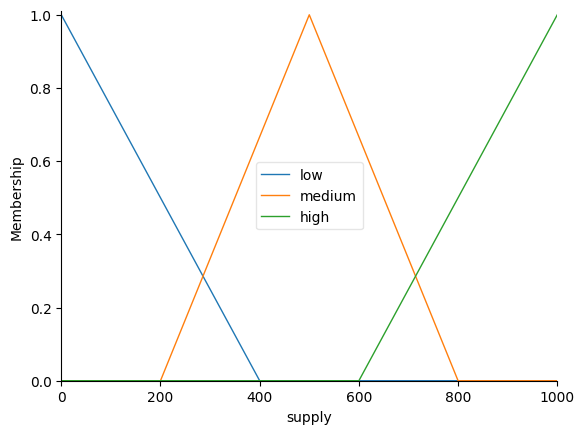


Visualizing Production Membership Functions and Output:


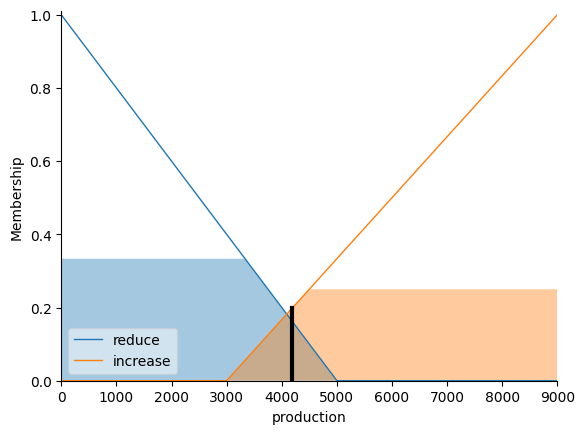

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the input variables: Demand and Supply
demand = ctrl.Antecedent(np.arange(0, 7001, 1), 'demand')
supply = ctrl.Antecedent(np.arange(0, 1001, 1), 'supply')

# Define the output variable: Production
production = ctrl.Consequent(np.arange(0, 9001, 1), 'production')

# Define membership functions for Demand
demand['low'] = fuzz.trimf(demand.universe, [0, 0, 3000])
demand['steady'] = fuzz.trimf(demand.universe, [0, 3000, 6000])
demand['high'] = fuzz.trimf(demand.universe, [3000, 7000, 7000])

# Define membership functions for Supply
supply['low'] = fuzz.trimf(supply.universe, [0, 0, 400])
supply['medium'] = fuzz.trimf(supply.universe, [200, 500, 800])
supply['high'] = fuzz.trimf(supply.universe, [600, 1000, 1000])

# Define membership functions for Production
production['reduce'] = fuzz.trimf(production.universe, [0, 0, 5000])
production['increase'] = fuzz.trimf(production.universe, [3000, 9000, 9000])

# Define fuzzy rules
rule1 = ctrl.Rule(demand['low'] & supply['low'], production['increase'])
rule2 = ctrl.Rule(demand['low'] & supply['medium'], production['reduce'])
rule3 = ctrl.Rule(demand['low'] & supply['high'], production['reduce'])
rule4 = ctrl.Rule(demand['steady'] & supply['low'], production['increase'])
rule5 = ctrl.Rule(demand['steady'] & supply['medium'], production['reduce'])
rule6 = ctrl.Rule(demand['steady'] & supply['high'], production['reduce'])
rule7 = ctrl.Rule(demand['high'] & supply['low'], production['increase'])
rule8 = ctrl.Rule(demand['high'] & supply['medium'], production['increase'])
rule9 = ctrl.Rule(demand['high'] & supply['high'], production['reduce'])

# Create a fuzzy control system
production_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
production_sim = ctrl.ControlSystemSimulation(production_ctrl)

# Set input values
input_demand = 2500  # Example: demand = 2500
input_supply = 300   # Example: supply = 300

production_sim.input['demand'] = input_demand
production_sim.input['supply'] = input_supply

# Compute the output
production_sim.compute()

# Display results
print("Input Values:")
print(f"Demand: {input_demand}")
print(f"Supply: {input_supply}")
print(f"Production: {production_sim.output['production']:.2f}")

# Visualize membership functions and result
print("\nVisualizing Demand Membership Functions:")
demand.view()
plt.show()

print("\nVisualizing Supply Membership Functions:")
supply.view()
plt.show()

print("\nVisualizing Production Membership Functions and Output:")
production.view(sim=production_sim)
plt.show()


Input Values:
Income: 8000
Debt: 4000
Credit History: 6
Creditworthiness: 50.00

Visualizing Income Membership Functions:


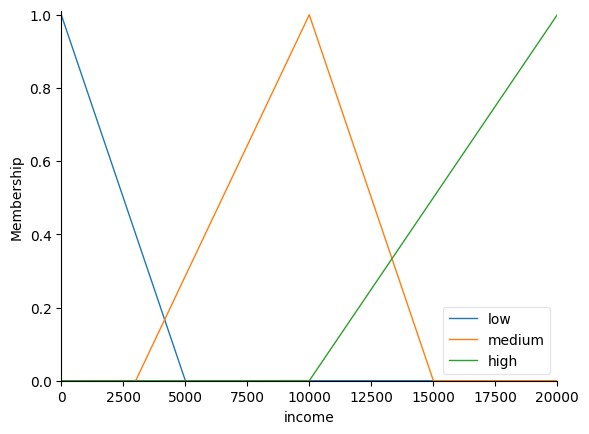


Visualizing Debt Membership Functions:


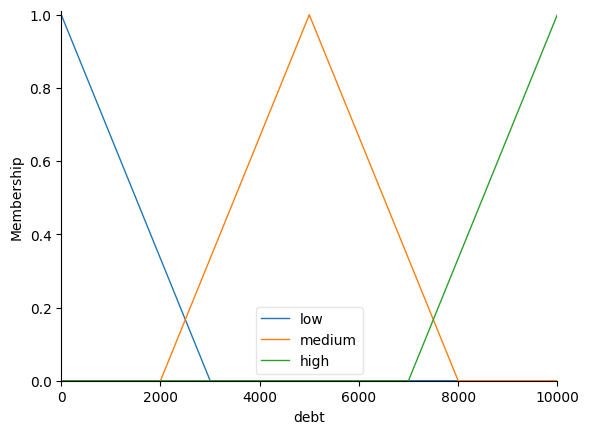


Visualizing Credit History Membership Functions:


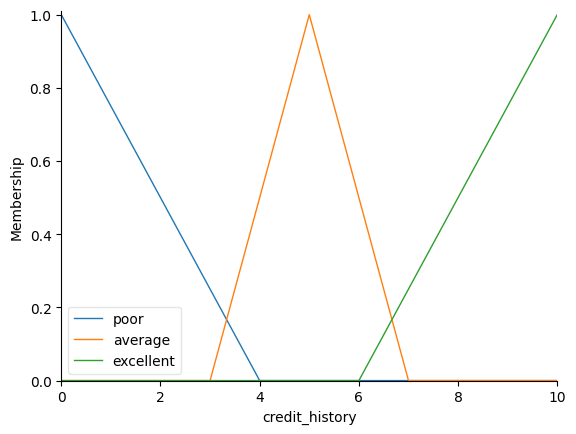


Visualizing Creditworthiness Membership Functions and Output:


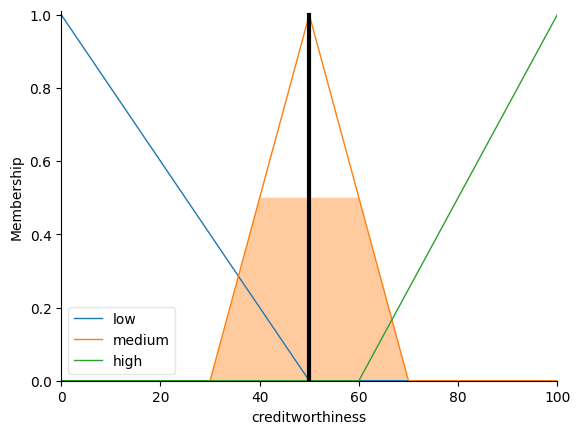

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Define the input variables: Monthly Income, Debt, and Credit History
income = ctrl.Antecedent(np.arange(0, 20001, 1), 'income')  # Monthly income (0 to 20,000)
debt = ctrl.Antecedent(np.arange(0, 10001, 1), 'debt')       # Debt (0 to 10,000)
credit_history = ctrl.Antecedent(np.arange(0, 11, 1), 'credit_history')  # Credit history score (0 to 10)

# Define the output variable: Creditworthiness
creditworthiness = ctrl.Consequent(np.arange(0, 101, 1), 'creditworthiness')  # Creditworthiness (0 to 100)

# Define membership functions for Income
income['low'] = fuzz.trimf(income.universe, [0, 0, 5000])
income['medium'] = fuzz.trimf(income.universe, [3000, 10000, 15000])
income['high'] = fuzz.trimf(income.universe, [10000, 20000, 20000])

# Define membership functions for Debt
debt['low'] = fuzz.trimf(debt.universe, [0, 0, 3000])
debt['medium'] = fuzz.trimf(debt.universe, [2000, 5000, 8000])
debt['high'] = fuzz.trimf(debt.universe, [7000, 10000, 10000])

# Define membership functions for Credit History
credit_history['poor'] = fuzz.trimf(credit_history.universe, [0, 0, 4])
credit_history['average'] = fuzz.trimf(credit_history.universe, [3, 5, 7])
credit_history['excellent'] = fuzz.trimf(credit_history.universe, [6, 10, 10])

# Define membership functions for Creditworthiness
creditworthiness['low'] = fuzz.trimf(creditworthiness.universe, [0, 0, 50])
creditworthiness['medium'] = fuzz.trimf(creditworthiness.universe, [30, 50, 70])
creditworthiness['high'] = fuzz.trimf(creditworthiness.universe, [60, 100, 100])

# Define fuzzy rules
rule1 = ctrl.Rule(income['low'] & debt['high'] & credit_history['poor'], creditworthiness['low'])
rule2 = ctrl.Rule(income['low'] & debt['medium'] & credit_history['average'], creditworthiness['low'])
rule3 = ctrl.Rule(income['medium'] & debt['low'] & credit_history['excellent'], creditworthiness['high'])
rule4 = ctrl.Rule(income['high'] & debt['low'] & credit_history['average'], creditworthiness['high'])
rule5 = ctrl.Rule(income['high'] & debt['medium'] & credit_history['excellent'], creditworthiness['high'])
rule6 = ctrl.Rule(income['medium'] & debt['high'] & credit_history['average'], creditworthiness['medium'])
rule7 = ctrl.Rule(income['low'] & debt['low'] & credit_history['poor'], creditworthiness['medium'])
rule8 = ctrl.Rule(income['medium'] & debt['medium'] & credit_history['average'], creditworthiness['medium'])
rule9 = ctrl.Rule(income['high'] & debt['high'] & credit_history['poor'], creditworthiness['low'])

# Create a fuzzy control system
credit_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
credit_sim = ctrl.ControlSystemSimulation(credit_ctrl)

# Set input values
input_income = 8000  # Example: monthly income = 8000
input_debt = 4000    # Example: debt = 4000
input_credit_history = 6  # Example: credit history score = 6

credit_sim.input['income'] = input_income
credit_sim.input['debt'] = input_debt
credit_sim.input['credit_history'] = input_credit_history

# Compute the output
credit_sim.compute()

# Display results
print("Input Values:")
print(f"Income: {input_income}")
print(f"Debt: {input_debt}")
print(f"Credit History: {input_credit_history}")
print(f"Creditworthiness: {credit_sim.output['creditworthiness']:.2f}")

# Visualize membership functions and result
print("\nVisualizing Income Membership Functions:")
income.view()
plt.show()

print("\nVisualizing Debt Membership Functions:")
debt.view()
plt.show()

print("\nVisualizing Credit History Membership Functions:")
credit_history.view()
plt.show()

print("\nVisualizing Creditworthiness Membership Functions and Output:")
creditworthiness.view(sim=credit_sim)
plt.show()
